In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv('movies.dat',sep=r'\s{2,}', engine='python',header=None)
movies.columns=['Movie']
def parseMovieDataSet(movie):
    m = movie.split("::")
    x = m[1].split("(")
    title = x[0].rstrip()
    year = x[1][:-1]
    return {'MovieID':m[0],'title':title,'year':year,'Genres':m[2]}
df_movie=pd.DataFrame(columns=['MovieID','Title','Genres'])
data = map(parseMovieDataSet,movies['Movie'])
df_movie=pd.DataFrame(data)

In [3]:
user = pd.read_csv('users.dat',sep=r'\s{2,}', engine='python',header=None)
user.columns=['user']
def parseUserData(user):
    u = user.split("::")
    return {'UserID':u[0],'Gender':u[1],'Age':u[2],'Occupation':u[3],'Zip-code':u[4]}
data = map(parseUserData,user['user'])
df_user=pd.DataFrame(data)

In [4]:
rating = pd.read_csv('ratings.dat',sep=r'\s{2,}', engine='python',header=None)
rating.columns=['rating']
def parseRatingData(rate):
    r= rate.split("::")
    return {'UserID':r[0],'MovieID':r[1],'Rating':r[2],'TimeStamp':r[3]}
data= map(parseRatingData,rating['rating'])
df_rating = pd.DataFrame(data)

In [5]:
df_rating.head()


,MovieID,Rating,TimeStamp,UserID
0,1193,5,978300760,1
1,661,3,978302109,1
2,914,3,978301968,1
3,3408,4,978300275,1
4,2355,5,978824291,1


In [6]:
df_user.head()

,Age,Gender,Occupation,UserID,Zip-code
0,1,F,10,1,48067
1,56,M,16,2,70072
2,25,M,15,3,55117
3,45,M,7,4,02460
4,25,M,20,5,55455


In [7]:

df_movie.head()

,Genres,MovieID,title,year
0,Animation|Children's|Comedy,1,Toy Story,1995
1,Adventure|Children's|Fantasy,2,Jumanji,1995
2,Comedy|Romance,3,Grumpier Old Men,1995
3,Comedy|Drama,4,Waiting to Exhale,1995
4,Comedy,5,Father of the Bride Part II,1995


##### Merging the data 

In [8]:
rating_and_user = pd.merge(df_rating,df_user,on='UserID')

In [9]:
df = pd.merge(rating_and_user,df_movie,on='MovieID')

In [10]:
df.head()

,MovieID,Rating,TimeStamp,UserID,Age,Gender,Occupation,Zip-code,Genres,title,year
0,1193,5,978300760,1,1,F,10,48067,Drama,One Flew Over the Cuckoo's Nest,1975
1,1193,5,978298413,2,56,M,16,70072,Drama,One Flew Over the Cuckoo's Nest,1975
2,1193,4,978220179,12,25,M,12,32793,Drama,One Flew Over the Cuckoo's Nest,1975
3,1193,4,978199279,15,25,M,7,22903,Drama,One Flew Over the Cuckoo's Nest,1975
4,1193,5,978158471,17,50,M,1,95350,Drama,One Flew Over the Cuckoo's Nest,1975


In [11]:
df.shape

(1000209, 11)

In [12]:
df = df.drop(['TimeStamp','Zip-code'],axis=1)

In [13]:
df.head()

,MovieID,Rating,UserID,Age,Gender,Occupation,Genres,title,year
0,1193,5,1,1,F,10,Drama,One Flew Over the Cuckoo's Nest,1975
1,1193,5,2,56,M,16,Drama,One Flew Over the Cuckoo's Nest,1975
2,1193,4,12,25,M,12,Drama,One Flew Over the Cuckoo's Nest,1975
3,1193,4,15,25,M,7,Drama,One Flew Over the Cuckoo's Nest,1975
4,1193,5,17,50,M,1,Drama,One Flew Over the Cuckoo's Nest,1975


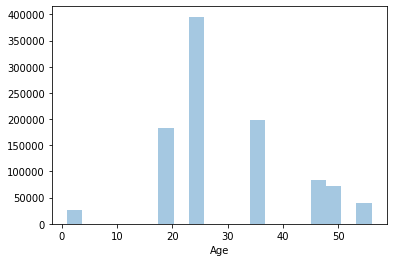

In [14]:
sns.distplot(df['Age'],kde=False,bins=20)

### the above histogram shows that the most of the user are of the age group of 25 -34 and the less are of the age group of under 18

In [15]:
toy_story = df[df['title']=='Toy Story']

In [16]:
toy_story.head()

,MovieID,Rating,UserID,Age,Gender,Occupation,Genres,title,year
41626,1,5,1,1,F,10,Animation|Children's|Comedy,Toy Story,1995
41627,1,4,6,50,F,9,Animation|Children's|Comedy,Toy Story,1995
41628,1,4,8,25,M,12,Animation|Children's|Comedy,Toy Story,1995
41629,1,5,9,25,M,17,Animation|Children's|Comedy,Toy Story,1995
41630,1,5,10,35,F,1,Animation|Children's|Comedy,Toy Story,1995


In [17]:
toy_story.shape

(2077, 9)

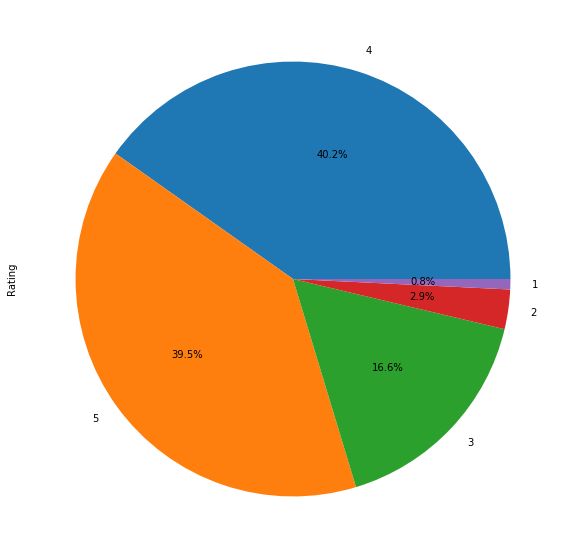

In [18]:
toy_story['Rating'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(15,10))

##### According to the the above pie chart the toy rating get the 4 rating most (i.e more that 40% ) of total rating similary it get the 5 rating in higher number i.e 39.5% of rating

In [19]:
df['Rating']=pd.to_numeric(df['Rating'])

In [20]:
rate_count_of_movies=pd.DataFrame(df.groupby('title').Rating.mean()).sort_values(by='Rating',ascending=False)

In [21]:
rate_count_of_movies.head(25)

,Rating
title,
Schlafes Bruder,5.000000
Smashing Time,5.000000
"Gate of Heavenly Peace, The",5.000000
Follow the Bitch,5.000000
Song of Freedom,5.000000
"Baby, The",5.000000
Lured,5.000000
One Little Indian,5.000000
Bittersweet Motel,5.000000


##### Here we first group the dataset according to the title of the movie and calculate the average rating of the movies and ascending them

In [22]:
df['UserID'] = pd.to_numeric(df['UserID'])

In [23]:
rate_by_2696 = df[df['UserID']==2696]

In [24]:
rate_by_2696 = rate_by_2696[['title','Rating']]

In [25]:
rate_by_2696

,title,Rating
24345,Back to the Future,2
29848,E.T. the Extra-Terrestrial,3
244232,L.A. Confidential,4
250014,Lone Star,5
273633,JFK,1
277808,"Talented Mr. Ripley, The",4
371178,Midnight in the Garden of Good and Evil,4
377250,Cop Land,3
598042,Palmetto,4
603189,"Perfect Murder, A",4


In [26]:
### UNIQUE GENERES

In [27]:
all_genere = list(set([g for genere in df['Genres'].unique() for g in genere.split("|")]))

In [28]:
all_genere

['Action',
 'Western',
 'Horror',
 'Romance',
 'Animation',
 'Musical',
 'Crime',
 'Mystery',
 'Adventure',
 'Comedy',
 'Sci-Fi',
 'Film-Noir',
 'Thriller',
 'War',
 'Drama',
 'Documentary',
 'Fantasy',
 "Children's"]

In [29]:
def moviegenereencoder(movie):    
    x = movie[1].split("|")
    d = {'MovieID':movie[0]}
    for u in all_genere:
        if u in x:
            d.update({u:1})
        else:
            d.update({u:0})
    return d

In [30]:
encoded_data = list(map(moviegenereencoder,df[['MovieID','Genres']].values))

In [31]:
df.columns

Index(['MovieID', 'Rating', 'UserID', 'Age', 'Gender', 'Occupation', 'Genres',
       'title', 'year'],
      dtype='object')

##### the above encoded_list directly can not convert to the dataframe due to the memory problem of the system so i will divide the data 
#### into chunk


In [32]:
del rate_count_of_movies,rate_by_2696,movies,user,rating,df_movie,df_rating,df_user,rating_and_user,toy_story

In [33]:

c1 = pd.DataFrame(encoded_data[0:333403])
c2 = pd.DataFrame(encoded_data[333404:666806])
c3 =pd.DataFrame(encoded_data[666806:len(encoded_data)-1])

In [34]:
cx = pd.concat([c1,c2],ignore_index=True)

In [35]:
final_encoded = pd.concat([cx,c3],ignore_index=True)

In [36]:
final_encoded.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,MovieID,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,0,1193,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,1193,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,1193,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,1193,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,1193,0,0,0,0,0,0,0


In [37]:
del c1,c2,c3,cx,encoded_data

In [43]:
from sklearn.preprocessing import LabelEncoder
lm = LabelEncoder()
df['Gender']=lm.fit_transform(df['Gender'])
df['Genras_'] = lm.fit_transform(df['Genres'])
df['Age']=pd.to_numeric(df['Age'])
df['Occupation']=pd.to_numeric(df['Occupation'])

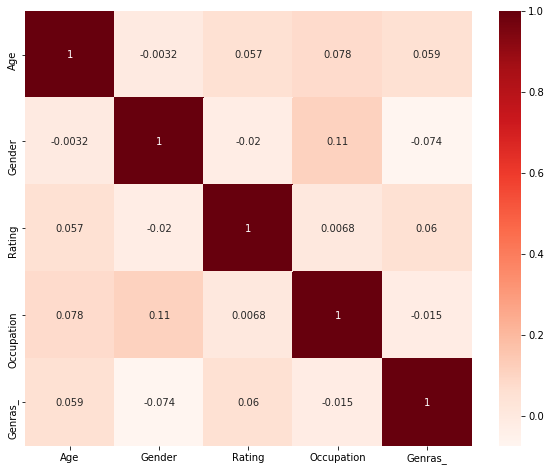

In [47]:
plt.figure(figsize=(10,8))
cor = df[['Age','Gender','Rating','Occupation','Genras_']].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

### the rating of the movie is highly affected by the genres,age group and gender

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [53]:
X = df[['Age','Genras_','Gender']].values

In [55]:
Y = df['Rating']

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [61]:
logisticRegression = LogisticRegression()

In [62]:
logisticRegression.fit(x_train,y_train)

c:\users\dipendra\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dipendra\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
logisticRegression.intercept_

array([-2.163284  , -1.70919492, -0.93572484, -0.80554652, -1.49653867])

In [64]:
logisticRegression.coef_

array([[-0.01807898, -0.00098118,  0.03419432],
       [-0.00914055, -0.00107787,  0.05909357],
       [ 0.00019835, -0.00074942,  0.0238582 ],
       [ 0.00462869,  0.00033697, -0.01937225],
       [ 0.00354658,  0.00126053, -0.07910019]])

In [65]:
logisticRegression.predict(x_test)

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [68]:
sqrt(mean_squared_error(y_test,logisticRegression.predict(x_test)))

1.192556640088276